In [350]:
import pandas as pd
import numpy as np

### Preparing the Dataset
---
Next, use only the following columns:

    'ram',
    
    'storage',
    
    'screen',
    
    'final_price'
    


In [351]:
file = pd.read_csv('laptops.csv')
file.columns = file.columns.str.lower().str.replace(' ', '_')
file.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [352]:
file.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [353]:
strings = list(file.dtypes[file.dtypes == 'object'].index)
for col in strings:
    file[col] = file[col].str.lower().str.replace(' ','_')
# file.dtypes

In [354]:
for col in file.columns:
        print("Column Name:       ", col)
        print("Unique Contents:   ", file[col].unique())
        print("Number of Unique:  ", file[col].nunique())
        print()

Column Name:        laptop
Unique Contents:    ['asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"'
 'alurin_go_start_intel_celeron_n4020/8gb/256gb_ssd/15.6"'
 'asus_expertbook_b1_b1502cba-ej0424x_intel_core_i3-1215u/8gb/256gb_ssd/15.6"'
 ...
 'razer_blade_17_fhd_360hz_intel_core_i7-11800h/32gb/1tb_ssd/rtx_3080/17.3"'
 'razer_book_13_intel_evo_core_i7-1165g7/16gb/1tb_ssd/13.4"_táctil'
 'razer_book_fhd+_intel_evo_core_i7-1165g7/16gb/256gb_ssd/13.4"_táctil']
Number of Unique:   2160

Column Name:        status
Unique Contents:    ['new' 'refurbished']
Number of Unique:   2

Column Name:        brand
Unique Contents:    ['asus' 'alurin' 'msi' 'hp' 'lenovo' 'medion' 'acer' 'apple' 'razer'
 'gigabyte' 'dell' 'lg' 'samsung' 'pccom' 'microsoft' 'primux' 'prixton'
 'dynabook_toshiba' 'thomson' 'denver' 'deep_gaming' 'vant' 'innjoo'
 'jetwing' 'millenium' 'realme' 'toshiba']
Number of Unique:   27

Column Name:        model
Unique Contents:    ['expertbook' 'go' 'katan

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

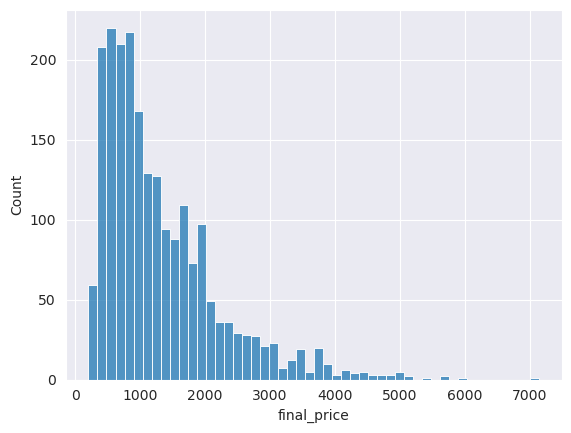

In [356]:
# sns.histplot(file.final_price[file.final_price < 6000], bins=50)
sns.histplot(file.final_price, bins=50)
plt.show()

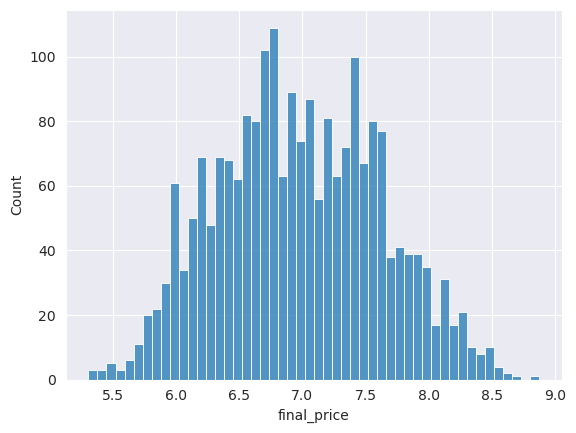

In [357]:
price_logarithmic = np.log1p(file.final_price)
sns.histplot(price_logarithmic, bins=50)
plt.show()

In [358]:
# file.isnull().sum()
file.columns[file.isnull().sum() > 0]

Index(['storage_type', 'gpu', 'screen'], dtype='object')


### Q1. There's one column with missing values. What is it?
---
Screen

In [359]:
# file.ram.describe()
file.ram.median()

16.0


### Q2. What's the median (50% percentile) for variable 'ram'?
---
16


### Prepare and split the dataset
---
    Shuffle the dataset (the filtered one you created above), use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [360]:
n = len(file)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print("Size of Dataframe and data adding up: ", n, n_val+n_test+n_train)
print("Size of Test:          %d, Validate: %d, Train %d" % (n_test, n_val, n_train))

# Create shuffled indexes
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx


# Grab the Shuffled Data and Split it
file_train = file.iloc[idx[:n_train]]
file_val = file.iloc[idx[n_train:n_train + n_val]]
file_test = file.iloc[idx[n_train + n_val:]]
print("Shuffled Size of Test: %d, Validate: %d, Train %d" % (len(file_test), len(file_val), len(file_train)))

# Reset the Indexes
file_train = file_train.reset_index(drop=True)
file_val = file_val.reset_index(drop=True)
file_test = file_test.reset_index(drop=True)

# Grab the logarithmic price and drop the final_price column
# y_train = np.log1p(file_train.final_price.values)
# y_val = np.log1p(file_val.final_price.values)
# y_test = np.log1p(file_test.final_price.values)
# del file_train['final_price']
# del file_val['final_price']
# del file_test['final_price']

y_train = file_train.final_price.values
y_val = file_val.final_price.values
y_test = file_test.final_price.values

Size of Dataframe and data adding up:  2160 2160
Size of Test:          432, Validate: 432, Train 1296
Shuffled Size of Test: 432, Validate: 432, Train 1296


In [361]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [362]:
file_train.screen.mean()

15.163534416086618

In [363]:
def prepare_X(file):
    file_num = file[base]
    
    ## Fill with Zeroes
    file_num = file_num.fillna(0)
    
    ## Fill with Mean of screen
    # file_num = file_num.fillna(file_train.screen.mean())
    
    X = file_num.values
    return X

In [364]:
base = ['ram', 'storage', 'screen']
X_train = prepare_X(file_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

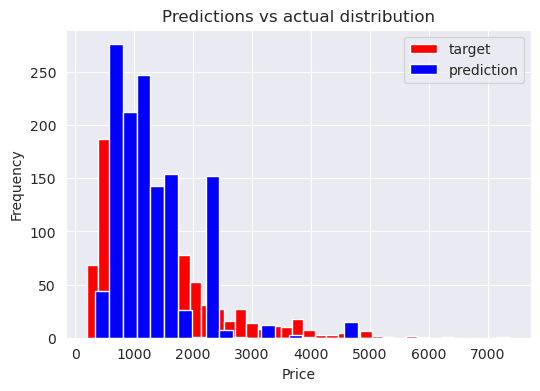

In [365]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=1, bins=30)
sns.histplot(y_pred, label='prediction', color='blue', alpha=1, bins=30)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

In [366]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [367]:
## Training RMSE
round(rmse(y_train, y_pred),2)

602.39

In [368]:
X_val = prepare_X(file_val)
y_pred = w_0 + X_val.dot(w)

In [369]:
## Validation RMSE
round(rmse(y_val, y_pred), 2)

597.36

### Q3: Which option gives better RMSE?
---

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    
- Fill with Zeroes = 597.36
- Fill with Mean = 600.27

Which option gives better RMSE?    

With Zeroes


In [370]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [371]:
X_train = prepare_X(file_train)
w_0, w = train_linear_regression_reg(X_train, y_train, 0.01)

## Validation RMSE
X_val = prepare_X(file_val)
y_pred = w_0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

597.36

In [372]:
r_list = [0, 0.01, 1, 10, 100]
for r in r_list:
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    X_val = prepare_X(file_val)
    y_pred = w_0 + X_val.dot(w)
    print("R=%.2f \tRMSE = %.2f" % (r, round(rmse(y_val, y_pred), 2)))
    

R=0.00 	RMSE = 597.36
R=0.01 	RMSE = 597.36
R=1.00 	RMSE = 597.21
R=10.00 	RMSE = 597.06
R=100.00 	RMSE = 597.90


### Q4: Which r gives the best RMSE?
---

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

10 has the lowest from the options presented as choices.


In [373]:
rmse_list = []
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seed_list:
    n = len(file)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    # Create shuffled indexes
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    idx
    
    
    # Grab the Shuffled Data and Split it
    file_train = file.iloc[idx[:n_train]]
    file_val = file.iloc[idx[n_train:n_train + n_val]]
    file_test = file.iloc[idx[n_train + n_val:]]
    
    # Reset the Indexes
    file_train = file_train.reset_index(drop=True)
    file_val = file_val.reset_index(drop=True)
    file_test = file_test.reset_index(drop=True)
    
    # Grab the logarithmic price and drop the final_price column
    # y_train = np.log1p(file_train.final_price.values)
    # y_val = np.log1p(file_val.final_price.values)
    # y_test = np.log1p(file_test.final_price.values)
    # del file_train['final_price']
    # del file_val['final_price']
    # del file_test['final_price']
    
    y_train = file_train.final_price.values
    y_val = file_val.final_price.values
    y_test = file_test.final_price.values

    X_train = prepare_X(file_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(file_val)
    y_pred = w_0 + X_val.dot(w)
    rmse_list.append(rmse(y_val, y_pred))
    # print("Seed=%d \tRMSE = %.2f" % (seed, round(rmse(y_val, y_pred), 2)))

In [374]:
np.std(rmse_list).round(3)

29.176

### Q5: What's the value of std?
---

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

    29.176

    Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [375]:
n = len(file)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Create shuffled indexes
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)


# Grab the Shuffled Data and Split it
file_train = file.iloc[idx[:n_train + n_val]]
file_test = file.iloc[idx[n_train + n_val:]]

print("Size of Dataframe and data adding up: ", n, n_val+n_test+n_train)
print("Size of Test:          %d, Train %d" % (len(file_test), len(file_train)))
print()

# Reset the Indexes
file_train = file_train.reset_index(drop=True)
file_test = file_test.reset_index(drop=True)

y_train = file_train.final_price.values
y_test = file_test.final_price.values

X_train = prepare_X(file_train)
w_0, w = train_linear_regression_reg(X_train, y_train, 0.001)
X_test = prepare_X(file_test)
y_pred = w_0 + X_test.dot(w)
print("Seed=%d \tRMSE = %.2f" % (seed, round(rmse(y_test, y_pred), 2)))

Size of Dataframe and data adding up:  2160 2160
Size of Test:          432, Train 1728

Seed=9 	RMSE = 608.61


### Q6: What's the RMSE on the test dataset?
---

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:
    608.60
